In [1]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow, figure
import cv2, os
%matplotlib inline
np.set_printoptions(threshold=np.inf)

In [2]:
W_values = np.genfromtxt("/home/manchanda/Projects/EmbeddedSystems/Weights_after_training.csv", dtype=float, delimiter=',')
yp = np.genfromtxt("/home/manchanda/Projects/EmbeddedSystems/yp_after_training.csv", dtype=float, delimiter=',')
print W_values.shape
print yp.shape

(16, 1024)
(150, 16)


In [3]:
def display_2D_array(arr):
    out=""
    for i in range(0,arr.shape[0]):
        out+="("
        for j in range(0,arr.shape[1]):
            out+=str(arr[i][j])
            if(j!=arr.shape[1]-1):
                out+=","
        out+=")"
        if(i!=arr.shape[0]-1):
            out+=","
    return out

In [4]:
W_values = W_values * 1000
W_values = W_values.astype(int)
#print W_values
text_file = open("/home/manchanda/Projects/EmbeddedSystems/W_values_for_FPGA.txt", "w")
text_file.write(display_2D_array(W_values))
text_file.close()


In [5]:
yp = yp * 20000
yp = yp.astype(int)
#print yp
text_file = open("/home/manchanda/Projects/EmbeddedSystems/yp_for_FPGA.txt", "w")
text_file.write(display_2D_array(yp))
text_file.close()

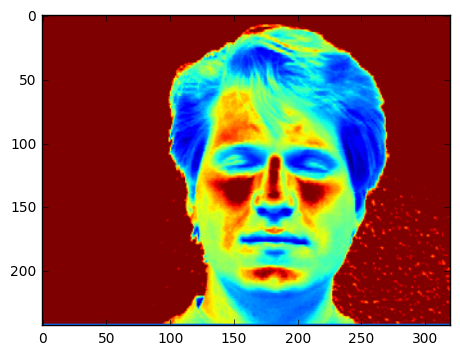

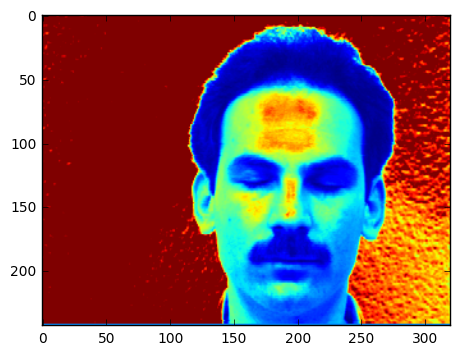

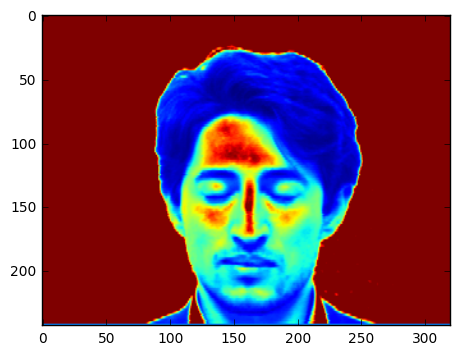

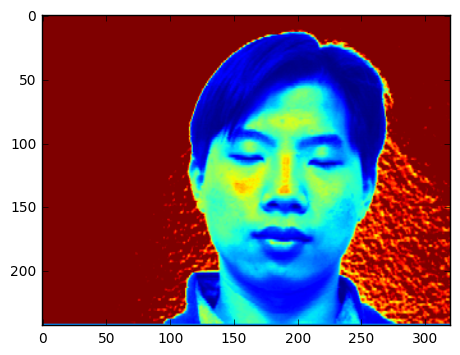

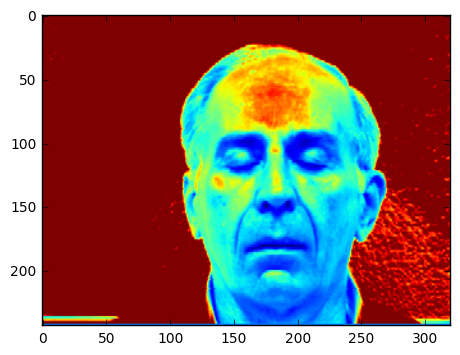

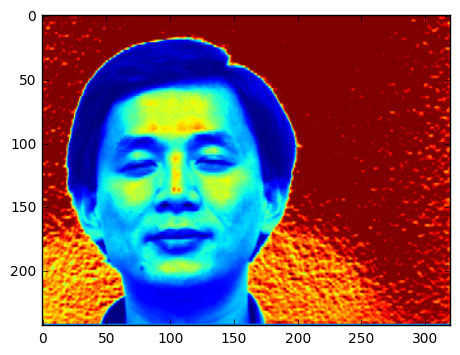

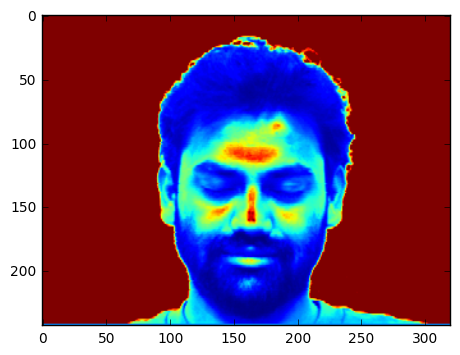

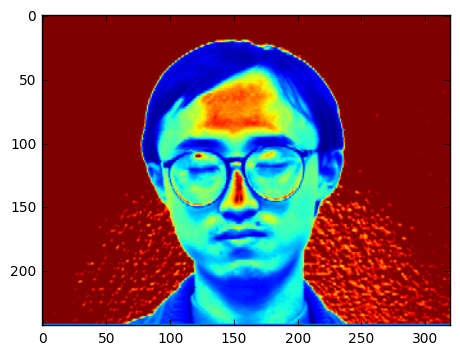

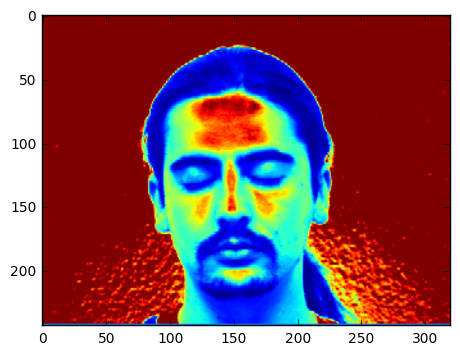

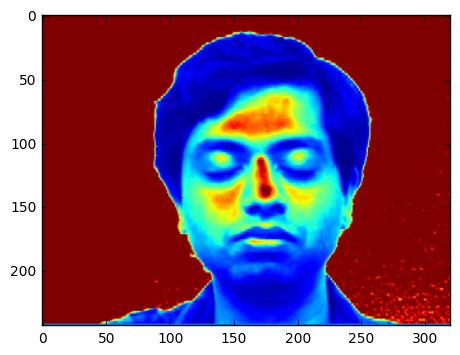

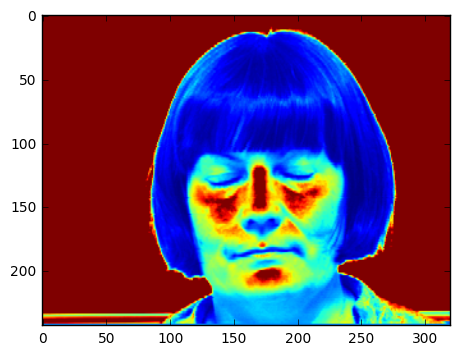

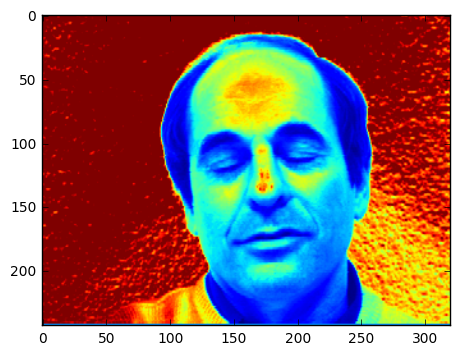

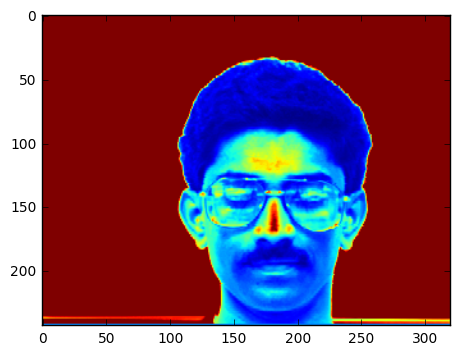

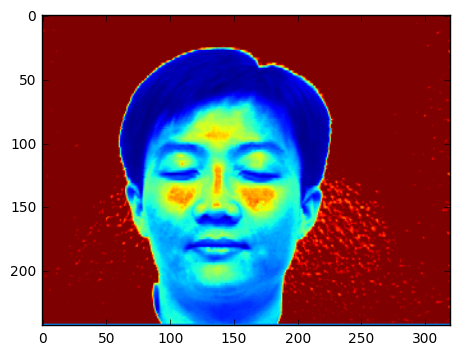

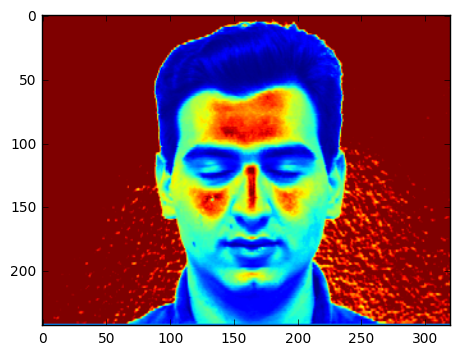

In [6]:
cascadePath = "/usr/share/opencv/haarcascades/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

import glob, os
normalised_image_array_recognise=np.empty([15, 1024])
lst=os.listdir("/home/manchanda/YALEFACS/Testing/")
lst.sort()
i=0
for file in lst:
    image_pil = Image.open("/home/manchanda/YALEFACS/Testing/"+file).convert('L')
    image = np.array(image_pil, 'uint8')
    figure()
    imshow(np.asarray(image))
    faces = faceCascade.detectMultiScale(
        image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(32, 32),
        #flags = cv2.CV_HAAR_SCALE_IMAGE
        #flags = cv2.CASCADE_SCALE_IMAGE
        flags = 0
    )
    face_img=0
    for (x, y, w, h) in faces:
        face_img=image[y: y + h, x: x + w]
    #figure()
    #imshow(np.asarray(face_img))
    resized_image = cv2.resize(face_img, (32, 32))
    #figure()
    #imshow(np.asarray(resized_image))
    #print resized_image
    resized_image = resized_image.reshape(1,1024)
    
    #
    #NORMALISE
    #
    #
    eps=1e-8
    resized_image = resized_image.copy()
    resized_image -= resized_image.min()
    divide = (resized_image.max() + eps)
    #print divide
    resized_image = resized_image / divide
    
    #MULTIPLY BY 255
    resized_image = resized_image * 20
    normalised_image_array_recognise[i]=resized_image
    i=i+1
    
normalised_image_array_recognise = normalised_image_array_recognise.astype(int)

text_file = open("/home/manchanda/Projects/EmbeddedSystems/X_for_FPGA.txt", "w")
text_file.write(display_2D_array(normalised_image_array_recognise))
text_file.close()

In [7]:
yp.shape


(150, 16)

In [8]:
W_values.shape

(16, 1024)

In [9]:
normalised_image_array_recognise.shape

(15, 1024)